## Split original dataset into training and testing datasets

In [1]:
import numpy as np
import pandas as pd
from src.config import raw_data_path, training_dataset_path, testing_dataset_path

In [2]:
%cd ..

/home/belu/VS Workplace/licentiate-thesis-repo


In [3]:
import src.data.notebook_utils as utils

df1 = utils.read_data(raw_data_path, organic_key=True)
len(df1)

6241

In [4]:
from src.config import training_dataset_path, data_types_path
import json

with open(data_types_path) as json_file:

    dtypes = json.load(json_file)
        
    df = pd.read_csv("data/raw/full-perovskite-data.csv", header=0)

/home/belu/.local/share/virtualenvs/licentiate-thesis-repo-cz9ujhZI/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (86,138,140,144,145,146,149,150,169,172,175,177,178,180,181,182,183,184,185,191,192,193,196,197,201,202,203,206,207,211,212,213,216,217,281,283,284,285,286,287,288,344,345,346,349,350,354,355,356,359,360,361,363,365,429,431,432,433,434,435,436,489,491,493,494,496,498,499,501,503,532,534,552,554,556,557,559,561,562,564,566,586,589,592,594,595,597,618,619,620,623,624,631,644,647,650,652,653,655,656,657,658,659,660,668,669,670,673,674,694,697,700,702,703,705,706,707,708,709,710,716) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
len(df)

9483

In [6]:
df[["_raw_ExpVer", "_raw_reagent_0_chemicals_0_InChIKey"]].value_counts()

_raw_ExpVer  _raw_reagent_0_chemicals_0_InChIKey
1.1          YEJRWHAVMIAJKC-UHFFFAOYSA-N            6241
             ZMXDDKWLCZADIW-UHFFFAOYSA-N            1096
             IAZDPXIOMUYVGZ-UHFFFAOYSA-N             960
0.0          YEJRWHAVMIAJKC-UHFFFAOYSA-N             832
1.0          YEJRWHAVMIAJKC-UHFFFAOYSA-N             336
dtype: int64

In [7]:

df_2 = df.loc[df['_raw_reagent_0_chemicals_0_InChIKey'] == 'ZMXDDKWLCZADIW-UHFFFAOYSA-N'] 

In [8]:
values2 = list(df_2['_rxn_organic-inchikey'].unique())
values1 = list(df1['_rxn_organic-inchikey'].unique())

In [53]:
overlap = [val for val in values2 if val in values1]

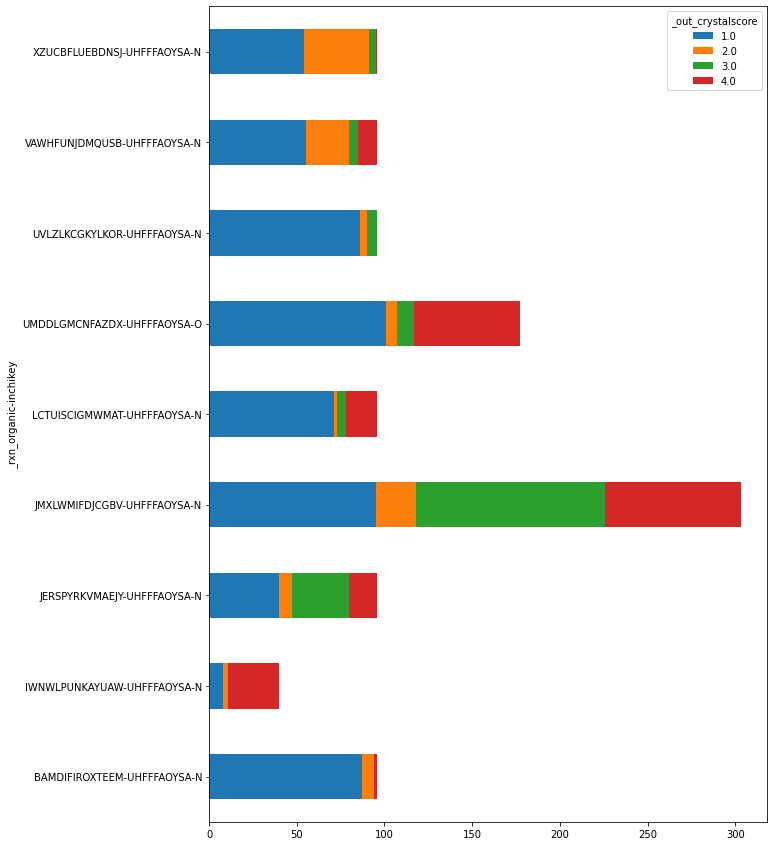

In [61]:
df_groupedby_inchi = df_2.groupby(by=['_rxn_organic-inchikey', '_out_crystalscore'])
ax = df_groupedby_inchi.size().unstack().plot.barh(stacked=True, figsize=(10,15), label='Crystal Score')


In [58]:
columns = utils.get_columns(df.columns)
columns['all'] = columns['_rxn_'].union(columns['_feat_'], {'_out_crystalscore'}) 

In [9]:
only_amine = df1.loc[df1['_rxn_organic-inchikey'] == 'XFYICZOIWSBQSK-UHFFFAOYSA-N'] # EtNH3I
only_amine[['_out_crystalscore']].value_counts()
only_amine.to_csv("data/preproccess/only_one_amine.csv", index=None)

In [25]:
only_amine.columns

Index(['_feat_CyclomaticNumber', '_feat_CarboaromaticRingCount',
       '_feat_CarboRingCount', '_feat_LargestRingSize', '_feat_RingAtomCount',
       '_feat_SmallestRingSize', '_feat_AromaticRingCount',
       '_feat_AromaticAtomCount', '_feat_BalabanIndex',
       '_feat_VanderWaalsSurfaceArea', '_feat_VanderWaalsVolume', '_feat_ASA',
       '_feat_WienerIndex', '_feat_maximalprojectionsize',
       '_feat_molsurfaceareaVDWp', '_feat_maximalprojectionsize',
       '_feat_MinimalProjectionArea', '_feat_minimalprojectionsize',
       '_feat_MaximalProjectionArea', '_feat_MolPol', '_feat_ASA_P',
       '_feat_msareaVDWp', '_feat_ASA', '_feat_ASA-',
       '_feat_MinimalProjectionRadius', '_feat_molsurfaceareaASAp',
       '_feat_LengthPerpendicularToTheMinArea', '_feat_WienerIndex',
       '_feat_ASA+', '_feat_MaximalProjectionRadius',
       '_feat_VanderWaalsSurfaceArea', '_feat_LengthPerpendicularToTheMaxArea',
       '_feat_VanderWaalsVolume', '_feat_BalabanIndex', '_feat_ASA_H',
  

In [19]:
# filter very imbalanced amines
df.drop(df.loc[df['_rxn_organic-inchikey'] == 'XFYICZOIWSBQSK-UHFFFAOYSA-N'].index, inplace = True) #EtNH3I
df.drop(df.loc[df['_rxn_organic-inchikey'] == 'JMXLWMIFDJCGBV-UHFFFAOYSA-N'].index, inplace = True) #MENH2I
df.drop(df.loc[df['_rxn_organic-inchikey'] == 'GGYGJCFIYJVWIP-UHFFFAOYSA-N'].index, inplace = True) # AcNH3I

df['_out_crystalscore'] = df['_out_crystalscore'].astype(int)
df.drop(df.loc[df['_out_crystalscore'] == 0].index, inplace = True)

Select only required columns

In [15]:
df = df[list(columns['all'])]

Raw data split into balanced training and testing sets 

In [16]:
train = df.groupby('_out_crystalscore').sample(frac=0.95, random_state=200) 
test = df.drop(train.index)

In [19]:
print("Train dataset size: {} \n Test dataset size: {}".format(len(train), len(test)))

Train dataset size: 3630 
 Test dataset size: 190


In [20]:
train.head()

,_feat_fr_NH1,_feat_acceptorcount,_feat_Refractivity,_feat_CyclomaticNumber,_feat_MaximalProjectionRadius,_feat_LargestRingSize,_feat_SmallestRingSize,_feat_LengthPerpendicularToTheMaxArea,_feat_molsurfaceareaASAp,_feat_LengthPerpendicularToTheMinArea,...,_feat_fr_pyridine,_feat_fr_ArN,_feat_AvgPol,_feat_fr_NH0,_feat_fr_piperdine,_feat_molsurfaceareaVDWp,_rxn_M_acid,_rxn_M_organic,_rxn_temperatureC_actual_bulk,_feat_fr_NH2
7021,0,0,39.63,0,4.60,0,0,5.30,215.08,9.19,...,0,0,11.82,0,0,203.20,5.266911,1.446923,95.0,0
1043,0,0,35.09,0,4.57,0,0,5.42,202.99,9.15,...,0,0,10.00,0,0,173.44,9.097759,0.742924,85.0,0
3491,0,2,26.66,0,3.14,0,0,3.59,120.89,6.29,...,0,0,5.94,0,0,95.68,2.143743,1.275064,95.0,3
9450,0,1,57.04,1,6.03,6,6,6.17,293.82,12.05,...,0,0,17.70,0,0,265.89,0.742125,1.111401,95.0,0
5157,0,0,30.38,0,3.36,0,0,5.24,167.58,6.58,...,0,0,7.93,0,0,141.67,2.188441,1.189214,95.0,0


In [21]:
train.to_csv(training_dataset_path, index=None)
test.to_csv(testing_dataset_path, index=None)